In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
one_exp1 = pd.read_csv("../../ExperimentScripts/OneChannel_Exp1_SmallGPU/progress.csv")
one_exp2 = pd.read_csv("../../ExperimentScripts/OneChannel_Exp2_SmallGPU/progress.csv")

# Only 1, 3 and 4 interesting
two_exp1 = pd.read_csv("../../ExperimentScripts/TwoChannel_Exp1_SmallGPU/progress.csv")

exp_3_first = pd.read_csv("../../ExperimentScripts/TwoChannel_Exp3_BigGPU/progress_old_60k.csv")
exp_3_sec = pd.read_csv("../../ExperimentScripts/TwoChannel_Exp3_BigGPU/progress_old_110k.csv")
exp_3_third = pd.read_csv("../../ExperimentScripts/TwoChannel_Exp3_BigGPU/progress_old_170k.csv")
exp_3_fourth = pd.read_csv("../../ExperimentScripts/TwoChannel_Exp3_BigGPU/progress.csv")
two_exp3 =  pd.concat([exp_3_first, exp_3_sec, exp_3_third, exp_3_fourth]).reset_index()

exp_3_first = pd.read_csv("../../ExperimentScripts/TwoChannel_Exp4_BigGPU/progress_old_10k.csv")
exp_3_sec = pd.read_csv("../../ExperimentScripts/TwoChannel_Exp4_BigGPU/progress_old_20k.csv")
exp_3_third = pd.read_csv("../../ExperimentScripts/TwoChannel_Exp4_BigGPU/progress_old_30k.csv")
exp_3_fourth = pd.read_csv("../../ExperimentScripts/TwoChannel_Exp4_BigGPU/progress_old_50k.csv")
exp_3_fifth = pd.read_csv("../../ExperimentScripts/TwoChannel_Exp4_BigGPU/progress.csv")
two_exp4 = pd.concat([exp_3_first, exp_3_sec, exp_3_third, exp_3_fourth, exp_3_fifth]).reset_index()

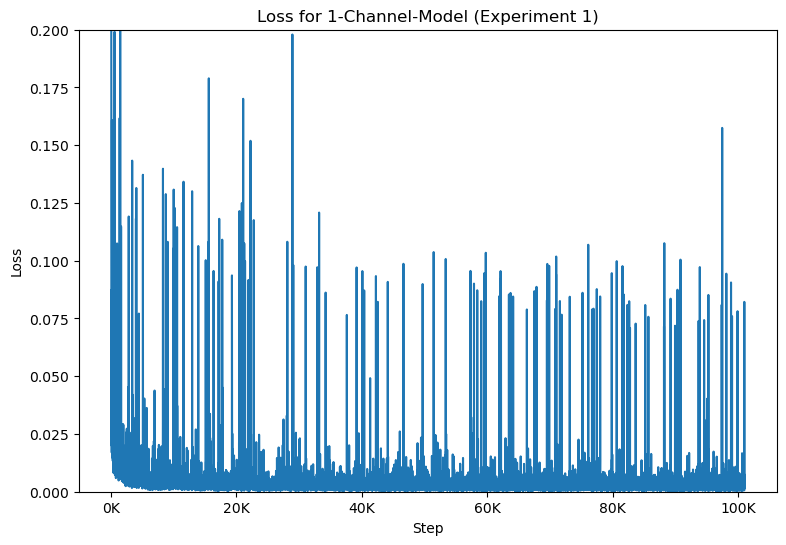

In [38]:
prog = one_exp1
name = "1-Channel-Model (Experiment 1)"
start = 0
plt.figure(figsize=(9,6))
plt.plot(prog.step, prog.loss)
plt.ylim(0,0.2)
plt.xlabel("Step")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.title(f"Loss for {name}")
plt.ylabel("Loss")

#plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
plt.savefig(fname=f"img/{name}", dpi=plt.gcf().dpi, bbox_inches='tight')

In [5]:
import numpy as np

# Normalize each point to num of seen pics
def get_loss_with_num_pics(loss_array, batch_size, save_interval=10):
    n_steps = len(loss_array)
    steps = np.arange(1,n_steps+1,1)*save_interval
    seen_pics = steps * batch_size
    return seen_pics, loss_array

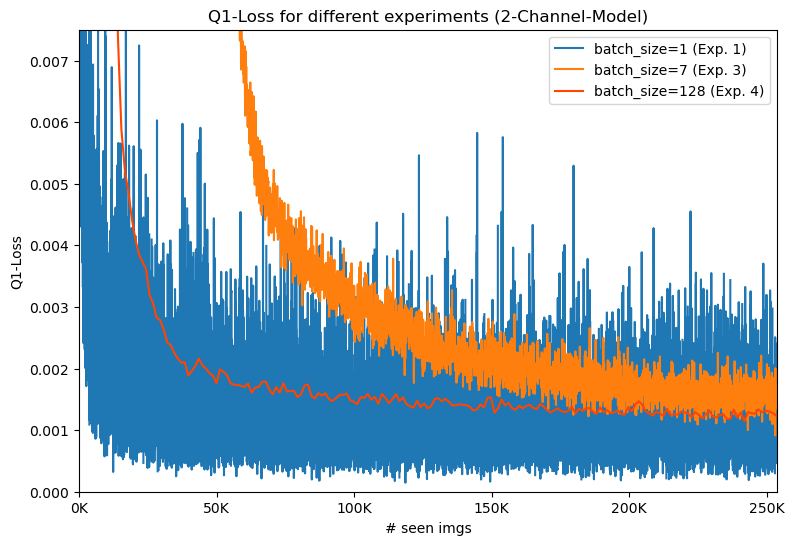

In [39]:
import matplotlib.ticker as ticker

start_from = 00000
to_plot_1 = two_exp1.loss_q1
to_plot_2 = two_exp3.loss_q1
to_plot_3 = two_exp4.loss_q1
seen_pics_1, loss_1 = get_loss_with_num_pics(to_plot_1, batch_size=1)
seen_pics_2, loss_2 = get_loss_with_num_pics(to_plot_2, batch_size=7)
seen_pics_3, loss_3 = get_loss_with_num_pics(to_plot_3, batch_size=128)

seen_pics_1_fin, loss_1_fin = seen_pics_1[seen_pics_1>start_from], loss_1[seen_pics_1>start_from]
seen_pics_2_fin, loss_2_fin = seen_pics_2[seen_pics_2>start_from], loss_2[seen_pics_2>start_from]
seen_pics_3_fin, loss_3_fin = seen_pics_3[seen_pics_3>start_from], loss_3[seen_pics_3>start_from]

end_at = min(seen_pics_3.max(), seen_pics_2.max(), seen_pics_1.max())

plt.figure(figsize=(9,6))
plt.plot(seen_pics_1_fin, loss_1_fin, label="batch_size=1 (Exp. 1)")
plt.plot(seen_pics_2_fin, loss_2_fin, label="batch_size=7 (Exp. 3)")
plt.plot(seen_pics_3_fin, loss_3_fin, label="batch_size=128 (Exp. 4)", c="orangered")
plt.xlabel("# seen imgs")
plt.ylabel("Q1-Loss")
plt.xlim((start_from, end_at))
plt.ylim((0,0.0075))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
plt.legend()
plt.title("Q1-Loss for different experiments (2-Channel-Model)")
plt.savefig(fname=f"img/batch_size_loss", dpi=plt.gcf().dpi, bbox_inches='tight')
plt.show()

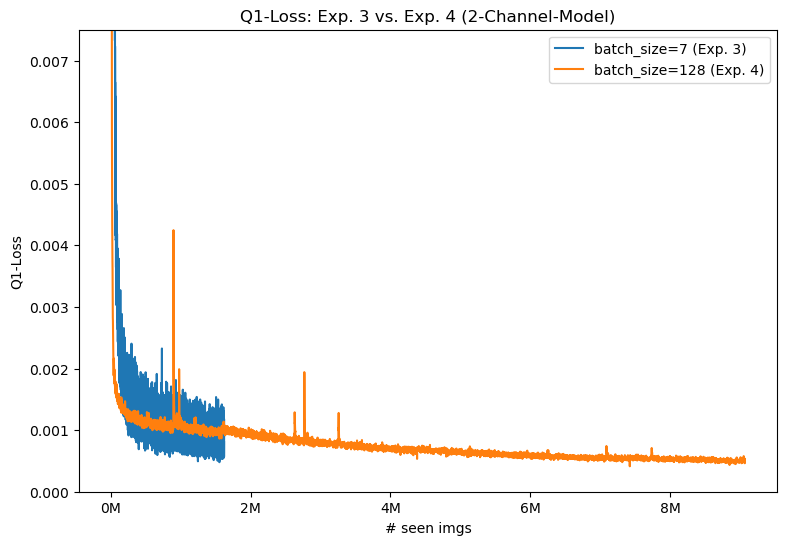

In [49]:
start_from = 00000
to_plot_1 = two_exp1.loss_q1
to_plot_2 = two_exp3.loss_q1
to_plot_3 = two_exp4.loss_q1
seen_pics_1, loss_1 = get_loss_with_num_pics(to_plot_1, batch_size=1)
seen_pics_2, loss_2 = get_loss_with_num_pics(to_plot_2, batch_size=7)
seen_pics_3, loss_3 = get_loss_with_num_pics(to_plot_3, batch_size=128)

seen_pics_1_fin, loss_1_fin = seen_pics_1[seen_pics_1>start_from], loss_1[seen_pics_1>start_from]
seen_pics_2_fin, loss_2_fin = seen_pics_2[seen_pics_2>start_from], loss_2[seen_pics_2>start_from]
seen_pics_3_fin, loss_3_fin = seen_pics_3[seen_pics_3>start_from], loss_3[seen_pics_3>start_from]

end_at = min(seen_pics_3.max(), seen_pics_2.max(), seen_pics_1.max())

plt.figure(figsize=(9,6))
plt.plot(seen_pics_2_fin, loss_2_fin, label="batch_size=7 (Exp. 3)")
plt.plot(seen_pics_3_fin, loss_3_fin, label="batch_size=128 (Exp. 4)",)
plt.xlabel("# seen imgs")
plt.ylabel("Q1-Loss")
#plt.xlim((start_from, end_at))
plt.ylim((0,0.0075))
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
plt.legend()
plt.title("Q1-Loss: Exp. 3 vs. Exp. 4 (2-Channel-Model)")
plt.savefig(fname=f"img/batch_size_loss_full_34", dpi=plt.gcf().dpi, bbox_inches='tight')
plt.show()

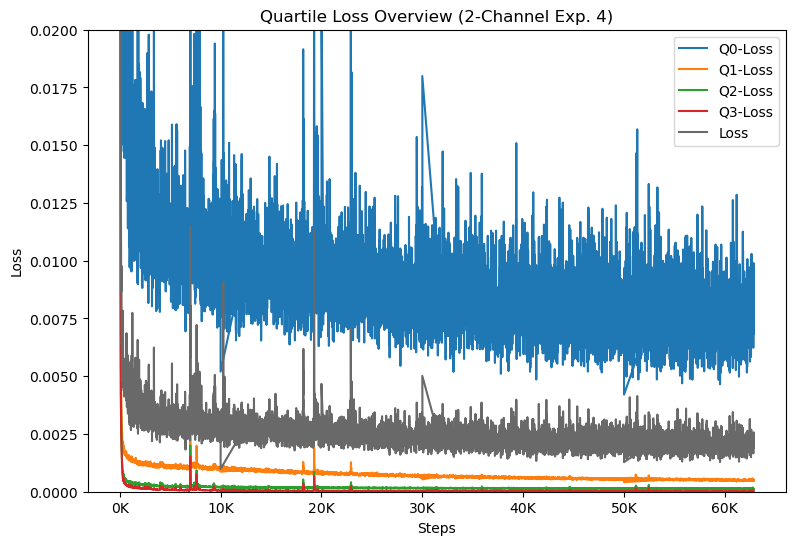

In [63]:
plt.figure(figsize=(9,6))
plt.title("Quartile Loss Overview (2-Channel Exp. 4)")
plt.plot(two_exp4.step, two_exp4.loss_q0, label="Q0-Loss")
plt.plot(two_exp4.step, two_exp4.loss_q1, label="Q1-Loss")
plt.plot(two_exp4.step, two_exp4.loss_q2, label="Q2-Loss")
plt.plot(two_exp4.step, two_exp4.loss_q3, label="Q3-Loss")
plt.plot(two_exp4.step, two_exp4.loss, label="Loss", c="dimgrey")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim((0, 0.02))
plt.savefig(fname=f"img/all_losses", dpi=plt.gcf().dpi, bbox_inches='tight')
plt.show()

(0.0, 3.0)

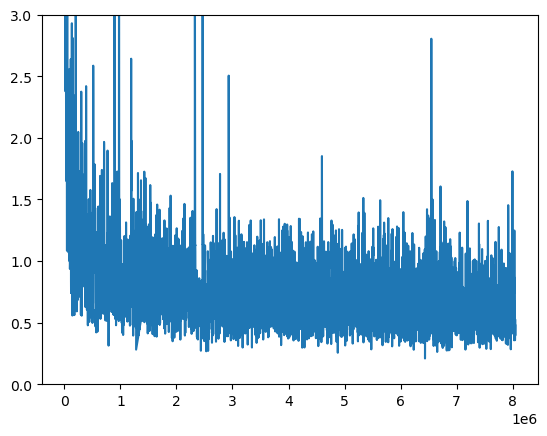

In [68]:
plt.plot(two_exp4.samples, two_exp4.grad_norm)
plt.ylim((0,3))

In [84]:
seen_pics_2

array([     70,     140,     210, ..., 1619380, 1619450, 1619520])

In [89]:
two_exp3.samples

0              7
1             77
2            147
3            217
4            287
          ...   
23131    1563737
23132    1563807
23133    1563877
23134    1563947
23135    1564017
Name: samples, Length: 23136, dtype: int64

In [85]:
two_exp3.step.max()

223430

In [93]:
# NEED TO REMOVE::::!
two_exp3[two_exp3.step.duplicated()]

,index,grad_norm,loss,loss_q0,loss_q1,loss_q2,loss_q3,mse,mse_q0,mse_q1,mse_q2,mse_q3,samples,step,vb,vb_q0,vb_q1,vb_q2,vb_q3
6238,0,0.502024,0.019492,0.067059,0.000915,0.000542,0.000165,0.014125,0.048284,0.000908,0.000538,0.000163,420007,60000,0.005367,0.018775,0.000007,0.000004,2.224070e-06
6239,1,0.102925,0.003713,0.012026,0.001257,0.000287,0.000177,0.003553,0.011449,0.001248,0.000285,0.000175,420077,60010,0.000161,0.000578,0.000009,0.000003,2.268899e-06
6240,2,0.081028,0.002715,0.008345,0.001006,0.000312,0.000177,0.002659,0.008159,0.000998,0.000309,0.000175,420147,60020,0.000056,0.000186,0.000007,0.000003,2.263494e-06
6241,3,0.099428,0.003465,0.011559,0.001384,0.000334,0.000180,0.003054,0.010055,0.001374,0.000331,0.000177,420217,60030,0.000411,0.001504,0.000010,0.000003,2.319008e-06
6242,4,0.135045,0.004713,0.013236,0.001346,0.000332,0.000176,0.004166,0.011580,0.001336,0.000329,0.000173,420287,60040,0.000547,0.001656,0.000010,0.000003,2.170038e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18024,232,0.138015,0.002829,0.008765,0.001044,0.000176,0.000069,0.002589,0.007936,0.001036,0.000174,0.000068,1206247,172320,0.000240,0.000829,0.000008,0.000002,8.825170e-07
18025,233,0.114687,0.002486,0.007540,0.001024,0.000254,0.000069,0.002403,0.007258,0.001017,0.000251,0.000069,1206317,172330,0.000083,0.000282,0.000008,0.000002,8.647804e-07
18026,234,0.112788,0.002763,0.009347,0.000692,0.000198,0.000067,0.002507,0.008412,0.000687,0.000196,0.000067,1206387,172340,0.000255,0.000934,0.000005,0.000002,8.600079e-07
18027,235,0.095932,0.002283,0.008666,0.000863,0.000176,0.000068,0.002121,0.007964,0.000856,0.000174,0.000067,1206457,172350,0.000163,0.000702,0.000006,0.000002,8.571552e-07


In [88]:
223430*7*10

15640100

In [77]:
two_exp4.samples.max()

1564017